In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 3e-13# J


PAR.N_photens = 3
PAR.t0_i       = [3, 0,0]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [1,3,5]  # Rms pulse duration / fs
PAR.E_i_abs    = [848,851.2,852,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (10,10,10)


PAR.I0_i =  [.4* XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[2])*pulse_energy_J]

print(*zip(PAR.E_i_abs,PAR.I0_i))


(848, 883.2324161972778) (851.2, 2199.779983949987) (852, 2197.7144628382966)


In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = True)

sim.par.I0_i

Loaded lookup table successfully.


[883.2324161972778, 2199.779983949987, 2197.7144628382966]

<IPython.core.display.Javascript object>


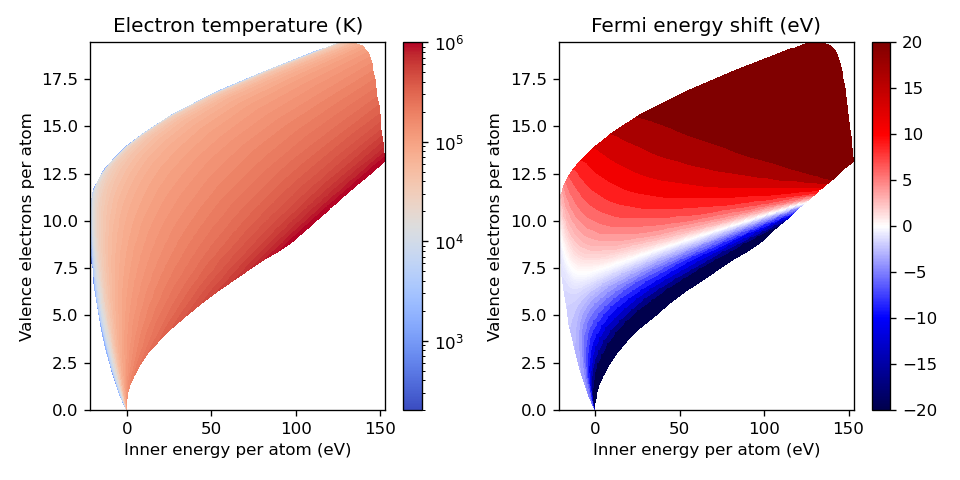

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:384: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl1 = ax1.pcolormesh(Ugrid, Rgrid, temperatures_gr, cmap=plt.cm.coolwarm,
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:394: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl2 = ax2.pcolormesh(Ugrid, Rgrid, fermi_energies_gr, cmap=plt.cm.seismic, vmin=-20, vmax=20,


<IPython.core.display.Javascript object>


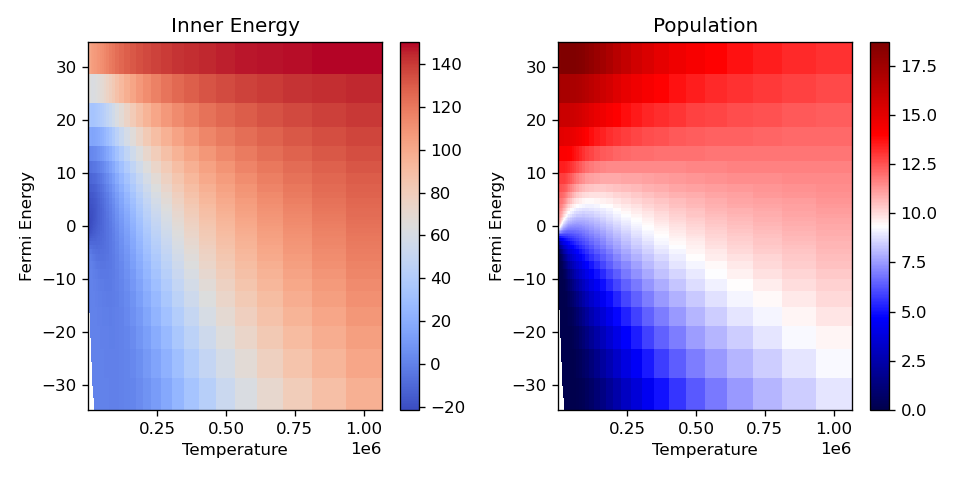

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:406: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl1 = ax1.pcolormesh(temperatures_gr, fermi_energies_gr, self.Ugrid, \
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:416: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl2 = ax2.pcolormesh(temperatures_gr, fermi_energies_gr, self.Rgrid, cmap=plt.cm.seismic,


CPU times: user 563 ms, sys: 542 ms, total: 1.11 s
Wall time: 565 ms


In [5]:
%%time

PAR.FermiSolver.plot_lookup_tables()

t:  -25.0
-21.631374276045122 10.0 -> 380.9382261361807 -4.190425784145191e-11
t:  -18.436370448787393
-21.631367972437957 10.00000459890296 -> 557.7109390930927 -8.125698727212693e-07
t:  -24.97505533031681
-21.631374252088655 10.000000017477849 -> 387.6651734684811 -1.2251513581418294e-08
t:  -24.962582995475216
-21.631374238930945 10.000000026685136 -> 387.4501168034891 -1.0505239345093287e-08
t:  -24.90022132126724
-21.63137417825724 10.00000007330091 -> 403.3846205087154 -1.72041545454249e-08
t:  -24.889134801408044
-21.631374174954573 10.000000081866439 -> 404.7059253214832 -1.696373530535311e-08
t:  -24.87527665158405
-21.631374159100666 10.00000009271901 -> 408.54958491535075 -2.004860455429025e-08
t:  -24.87527665158405
-21.631374147132647 10.000000092738661 -> 411.42051371439516 -2.281213795640724e-08
t:  -24.759970409843252
-21.63137402013441 10.000000183621532 -> 432.2568175531403 -4.921251672840299e-08
t:  -24.702317288972854
-21.631373937438315 10.000000240871113 -> 441.9

t:  -13.624431681276572
-21.61892023640544 10.006857034747602 -> 1546.861571742585 0.005958339669088986
t:  -13.624431681276572
-21.61896052067161 10.00688360406016 -> 1546.16878054443 0.005957570996582007
t:  -13.424431681276573
-21.617440476743006 10.007702979441067 -> 1586.149629982745 0.0069530755475746275
t:  -13.324431681276572
-21.61648701900128 10.008215088641538 -> 1609.746277720047 0.007617766795004144
t:  -12.824431681276572
-21.611382939901077 10.010924858010963 -> 1727.5807791207378 0.011390536162235065
t:  -12.735542792387683
-21.61033760266409 10.011451824394033 -> 1750.1774832800627 0.012225158852936957
t:  -12.624431681276572
-21.60895154092183 10.012187213018526 -> 1778.1932299216476 0.013222238843258793
t:  -12.624431681276572
-21.60893551099791 10.012232951981744 -> 1780.3914621667375 0.013342171549570736
t:  -12.424431681276573
-21.60635506272139 10.013590076736765 -> 1830.6181464073065 0.015371566406155779
t:  -12.324431681276572
-21.60476689035128 10.014422555358

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:639: UserWarning: Correcting a significant non-zero sum in thermalization
  warnings.warn('Correcting a significant non-zero sum in thermalization')


t:  -9.824431681276572
-21.536082419484263 10.049170821530174 -> 2852.0675324731606 0.08739086123194362
t:  -9.735542792387683
-21.532269303688242 10.050995571915976 -> 2899.23270609853 0.09184466671677605
t:  -9.624431681276572
-21.527055327892356 10.053530237959395 -> 2962.2363844102283 0.09798906013212338
t:  -9.624431681276572
-21.52684594225127 10.05371528486392 -> 2964.6561747150017 0.09820985142489391
t:  -9.424431681276573
-21.51738030532259 10.058355385110724 -> 3082.011413867172 0.10970606708949937
t:  -9.324431681276572
-21.511840644127254 10.061040955283627 -> 3145.757757069798 0.11642502178460212
t:  -8.824431681276572
-21.483613692618974 10.074823999232748 -> 3481.6614219310163 0.15227303427660388
t:  -8.735542792387683
-21.478959676757945 10.077319442545726 -> 3536.2219338489695 0.15868038666175543
t:  -8.624431681276572
-21.471572909338967 10.080796688068343 -> 3620.515685135605 0.16812712974671484
t:  -8.624431681276572
-21.47023216186733 10.081084054605466 -> 3634.351

-19.182924513768903 10.202721905911638 -> 17594.19275088225 1.875612292804961
t:  3.19334277555767
-19.143908260581288 10.197217707516087 -> 17764.349583626787 1.8871280843128346
t:  3.69334277555767
-18.954870436854257 10.171258195150067 -> 18584.734594495512 1.9437498182938349
t:  3.782231664446559
-18.92277644552542 10.16627807399132 -> 18722.0347546241 1.9520226715273772
t:  3.89334277555767
-18.885017724800832 10.162356985097471 -> 18882.624823728027 1.9651663397275119
t:  3.89334277555767
-18.885701051700202 10.16417249588265 -> 18878.990995443557 1.9669073222640492
t:  4.09334277555767
-18.817642884584956 10.157033757248326 -> 19172.465358208807 1.9894943260260138
t:  4.19334277555767
-18.787161405133073 10.154864667914675 -> 19299.91303424132 1.9993935051003753
t:  4.69334277555767
-18.634986390494923 10.143584892882185 -> 19944.251236783268 2.054243015993153
t:  4.7822316644465594
-18.606971421702553 10.14079933630682 -> 20058.662767911148 2.0628837876475608
t:  4.893342775557

t:  17.19237718726156
-15.407312480316428 9.972939126072237 -> 32148.924411989894 2.9581507699782286
t:  17.69237718726156
-15.280229158440882 9.966762957655096 -> 32591.022133111765 2.985172303108339
t:  17.781266076150448
-15.254610350956975 9.965680921103951 -> 32681.474247850503 2.990214208166986
t:  17.89237718726156
-15.227448497309844 9.9643431128509 -> 32775.2812305773 2.9951815879713077
t:  17.89237718726156
-15.231849455279365 9.964348913224306 -> 32763.545883176208 2.994394348519384
t:  18.092377187261558
-15.181250247031045 9.961947913599303 -> 32934.25169947942 3.005149377992737
t:  18.19237718726156
-15.156433713620643 9.96078187149595 -> 33021.886191722726 3.0104710012649374
t:  18.69237718726156
-15.028939702787484 9.954986446563508 -> 33461.79006137562 3.0367077345730316
t:  18.781266076150448
-15.00205230728055 9.953971933031275 -> 33556.51996748171 3.0431115238366395
t:  18.89237718726156
-14.974392968691275 9.952718821123426 -> 33651.103574923225 3.049371926280662
t

t:  30.93316619763517
-12.079234643878038 9.865266465372265 -> 43126.146047152375 3.5864764905761035
t:  31.03247465282457
-12.057057492950607 9.864890005387373 -> 43191.983051946736 3.589723596443916
t:  31.52901692877155
-11.947063087052442 9.863025966426436 -> 43536.59231398911 3.6095766955587063
t:  31.617291111162125
-11.927694658760428 9.862701634263056 -> 43595.66195137243 3.612958926036711
t:  31.727633839150343
-11.903762646654146 9.86230751133926 -> 43670.83773625868 3.6155976012556117
t:  31.727633839150343
-11.903194292349852 9.862314213766885 -> 43671.41918334228 3.617102317654645
t:  31.927633839150342
-11.859542397242532 9.861603916049926 -> 43808.910740394815 3.6243285817543587
t:  32.02763383915034
-11.83762886343212 9.861268450062857 -> 43875.95915000184 3.6275618078398946
t:  32.52763383915034
-11.726715145586823 9.85960858202738 -> 44219.4919291998 3.646793830062938
t:  32.61652272803923
-11.704102610827022 9.85932028630923 -> 44289.58646407522 3.649971464537394
t: 

-9.334022374732204 9.84528199917765 -> 51331.40140009559 4.034910584939171
t:  44.68591564231776
-9.318095996203063 9.845321758037871 -> 51380.83798005706 4.03676362405959
t:  45.14443960594744
-9.227854904382589 9.845527007104103 -> 51636.78105403436 4.051705335130428
t:  45.22595497725938
-9.195663348809418 9.845566058865309 -> 51727.47036323027 4.056737294318221
t:  45.32784919139931
-9.180157085027309 9.845619129346796 -> 51772.60770690206 4.058324916709854
t:  45.32784919139931
-9.204308432865052 9.845621491929663 -> 51703.96177540668 4.054709603589462
t:  45.514481884073724
-9.171526987191331 9.845719922876937 -> 51796.469579214914 4.059651824758113
t:  45.607798230410936
-9.155230916103509 9.845776401628985 -> 51842.13165486767 4.063124074803659
t:  46.07437996209697
-9.082019247687473 9.84606490537829 -> 52053.37343782971 4.074314401000404
t:  46.15732782550782
-9.08167909919414 9.846118271762151 -> 52052.523827374236 4.073752446043084
t:  46.261012654771385
-9.062184645357418 

-7.424285051946934 9.860752870063815 -> 56635.63167803488 4.332431805240715
t:  56.83972162609763
-7.414488129091116 9.860900085897436 -> 56664.38313009825 4.333467231775895
t:  57.22631413525187
-7.353469757970365 9.861637604374373 -> 56829.52659719803 4.342021635108939
t:  57.29504169243484
-7.326972749609439 9.861769261191085 -> 56901.78903030634 4.346005914981042
t:  57.38095113891357
-7.31642438526821 9.861934925012667 -> 56930.45684487713 4.347887179819043
t:  57.38095113891357
-7.340163731547673 9.861935556983132 -> 56868.996022532265 4.343564269307347
t:  57.53162750220398
-7.319200884811437 9.862226351249639 -> 56921.830708589514 4.347553563110839
t:  57.60696568384919
-7.309280647862427 9.862373291295313 -> 56948.23415761409 4.349695305057164
t:  57.983656592075235
-7.260572915357792 9.863109197441897 -> 57077.1178299087 4.357108163971677
t:  58.05062386464875
-7.254179232303221 9.863240391877168 -> 57098.5236001563 4.357173632039881
t:  58.13433295536565
-7.24325169541293 9.

t:  66.66411238781556
-6.2096364046498085 9.881601085197822 -> 59846.13183794334 4.519483865303394
t:  66.96615047662475
-6.1772349274992076 9.88227405015902 -> 59930.80345228996 4.524068632130497
t:  67.0198461368575
-6.171782354167084 9.882393618457225 -> 59944.78157895107 4.525536015816815
t:  67.08696571214843
-6.164178991946649 9.882543322390184 -> 59964.80755716132 4.526473460460174
t:  67.08696571214843
-6.163751626694246 9.882543539497107 -> 59965.88022613993 4.526761885921621
t:  67.2077809476721
-6.150904862946822 9.882813005907625 -> 59999.46819998376 4.528639633927815
t:  67.26818856543395
-6.144470187890247 9.882947854450407 -> 60012.55395184459 4.53006878417019
t:  67.57022665424313
-6.117338835644706 9.883622076807765 -> 60087.67934727464 4.533403825768165
t:  67.62392231447588
-6.120677011608669 9.88374183815145 -> 60075.84475579975 4.533648439543713
t:  67.69104188976681
-6.111731226329523 9.883891773926827 -> 60095.66015897732 4.535539152388386
t:  67.69104188976681
-

t:  72.44566541273338
-5.628160797062838 9.89450435665499 -> 61338.77162543894 4.6092126912637195
t:  72.50157871233749
-5.623585080009095 9.89462837512971 -> 61350.28026361673 4.610440648797907
t:  72.50157871233749
-5.6209419146121995 9.894628472567524 -> 61359.5482928035 4.609975266441927
t:  72.59969718586999
-5.611513929112667 9.894846066935195 -> 61379.80354108581 4.612453522179141
t:  72.64875642263623
-5.607221909360232 9.894954750231621 -> 61391.26384009542 4.612292342276895
t:  72.89405260646744
-5.579174054177002 9.895497994376676 -> 61462.27990086265 4.6175269872012255
t:  72.93766081692632
-5.5646909916250396 9.895594465607276 -> 61498.54875267166 4.619178737435075
t:  72.99217107999993
-5.5609958577876 9.895715080194911 -> 61511.53054873346 4.619657236000579
t:  72.99217107999993
-5.575238848182915 9.895715128835143 -> 61472.56121845179 4.617977289202473
t:  73.09425738700314
-5.565858970207669 9.895940964841246 -> 61497.04601615741 4.618688480302264
t:  73.14530054050473

-21.63136059326945 10.000008576727081 -> 599.7659242946459 -1.8058653576957795e-06
-21.631338017325078 10.000022188161601 -> 661.7762951062628 -3.674604620584887e-06
-21.631284818950014 10.00005387560671 -> 728.7119099671276 -5.505817872730745e-06
-21.631163696436257 10.00012479618183 -> 807.4325838757541 -2.3705567055998245e-06
-21.6309020903585 10.000277298449468 -> 894.6821291609526 2.5035836106468423e-05
-21.630386944323636 10.00057538469684 -> 990.8208002585422 0.00012140391129022987
-21.629443307992872 10.001112021604882 -> 1095.247844324365 0.00038124538774475525
-21.62774490940967 10.002059926268526 -> 1215.8691199559896 0.0010096662369196707
-21.62466409135392 10.003769298414177 -> 1362.2714312835888 0.0025199970466687205
-21.61896052067161 10.00688360406016 -> 1546.16878054443 0.005957570996582007
-21.60893551099791 10.012232951981744 -> 1780.3914621667375 0.013342171549570736
-21.592377498190043 10.020871184428984 -> 2074.884223136257 0.027646197374942005
-21.56625366843559 

-5.6209419146121995 9.894628472567524 -> 61359.5482928035 4.609975266441927
-5.575238848182915 9.895715128835143 -> 61472.56121845179 4.617977289202473
-5.528067385659528 9.896842724928604 -> 61595.00814058911 4.624583912634856
-5.479503784635207 9.898001510467509 -> 61713.42635271922 4.632686816257458
-5.4286247633167095 9.899257190936213 -> 61840.55144088932 4.641179882389952
-5.378838510779755 9.900496087337594 -> 61971.59639035568 4.647658013388854
-5.3258721667255475 9.90180889203932 -> 62100.730308639926 4.65658669949099
-5.270666915553758 9.903191498949205 -> 62241.268539356526 4.665430085073318
-5.218535300809601 9.904534059513967 -> 62370.49745028094 4.673355647683975
-5.1676608347695066 9.905849980662616 -> 62497.93435550551 4.68184315718864
-5.118349543524721 9.90716157097425 -> 62620.99359636289 4.689426406257798
-5.070371678457548 9.908441865690463 -> 62743.659143837445 4.6962745248471105
-5.023549841234168 9.9096577593452 -> 62859.274782702414 4.703366300887385
-4.9809739

<IPython.core.display.Javascript object>


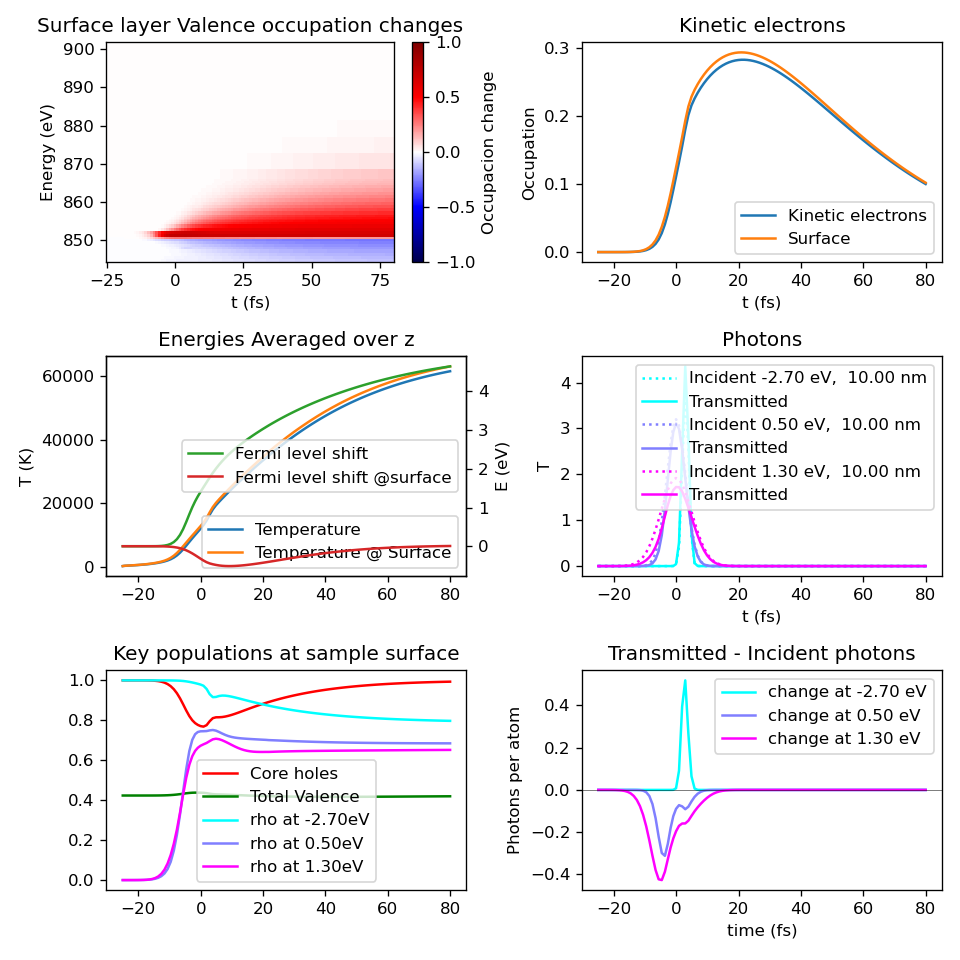

Transmission:  [113.94855744  91.33628943  80.43150712]  %
CPU times: user 1min 43s, sys: 1.31 s, total: 1min 44s
Wall time: 1min 43s


In [6]:
%%time
sim_options = dict(t_span=[-25, 80],
                   method='RK45',
                   rtol=1e-4, atol=1e-8, 
                   plot = True,
                   return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


-21.631374276045122 10.0 -> 380.9382261361807 -4.190425784145191e-11
-21.631374147132647 10.000000092738661 -> 411.42051371439516 -2.281213795640724e-08
-21.63137326506356 10.000000696865175 -> 482.32960228433524 -2.238855927316763e-07
-21.631369761896316 10.000002947332689 -> 541.4820774933911 -6.897164190888816e-07
-21.63136059326945 10.000008576727081 -> 599.7659242946459 -1.8058653576957795e-06
-21.631338017325078 10.000022188161601 -> 661.7762951062628 -3.674604620584887e-06
-21.631284818950014 10.00005387560671 -> 728.7119099671276 -5.505817872730745e-06
-21.631163696436257 10.00012479618183 -> 807.4325838757541 -2.3705567055998245e-06
-21.6309020903585 10.000277298449468 -> 894.6821291609526 2.5035836106468423e-05
-21.630386944323636 10.00057538469684 -> 990.8208002585422 0.00012140391129022987
-21.629443307992872 10.001112021604882 -> 1095.247844324365 0.00038124538774475525
-21.62774490940967 10.002059926268526 -> 1215.8691199559896 0.0010096662369196707
-21.62466409135392 10.

-5.8009025086140635 9.89043460028803 -> 60900.11577640166 4.5825481204896565
-5.75359723147838 9.891506632773874 -> 61018.923202423415 4.590203973862032
-5.709213709765752 9.892545206616894 -> 61132.023445037565 4.597270923122007
-5.667974657830437 9.893511225719525 -> 61235.245388355026 4.603342116644535
-5.6209419146121995 9.894628472567524 -> 61359.5482928035 4.609975266441927
-5.575238848182915 9.895715128835143 -> 61472.56121845179 4.617977289202473
-5.528067385659528 9.896842724928604 -> 61595.00814058911 4.624583912634856
-5.479503784635207 9.898001510467509 -> 61713.42635271922 4.632686816257458
-5.4286247633167095 9.899257190936213 -> 61840.55144088932 4.641179882389952
-5.378838510779755 9.900496087337594 -> 61971.59639035568 4.647658013388854
-5.3258721667255475 9.90180889203932 -> 62100.730308639926 4.65658669949099
-5.270666915553758 9.903191498949205 -> 62241.268539356526 4.665430085073318
-5.218535300809601 9.904534059513967 -> 62370.49745028094 4.673355647683975
-5.1676

<IPython.core.display.Javascript object>


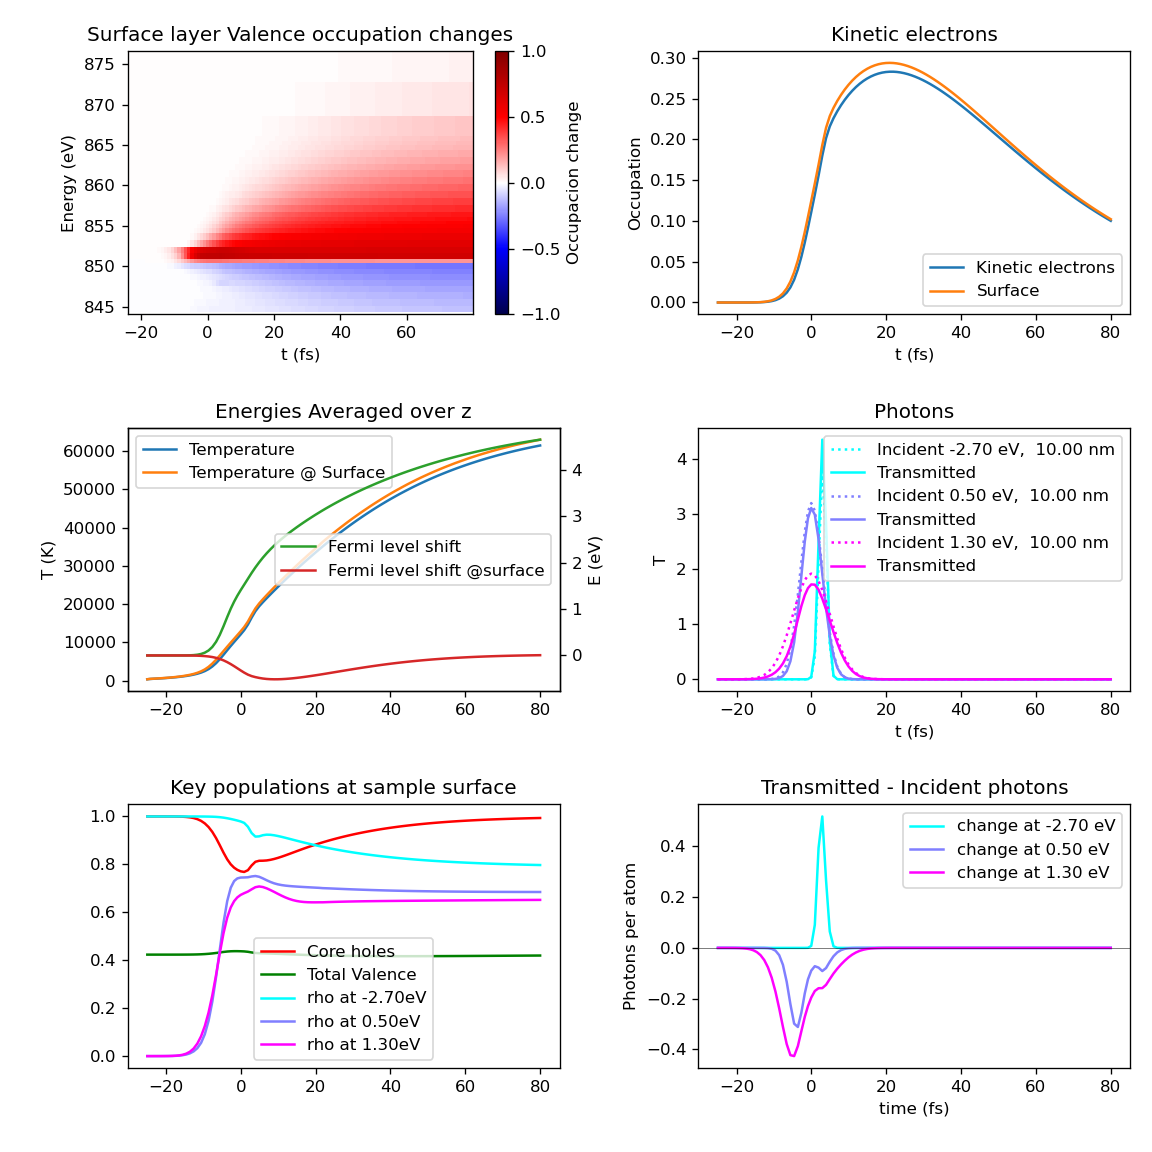

In [13]:
sim.plot_results(sol, sol.photon_densities)

<IPython.core.display.Javascript object>


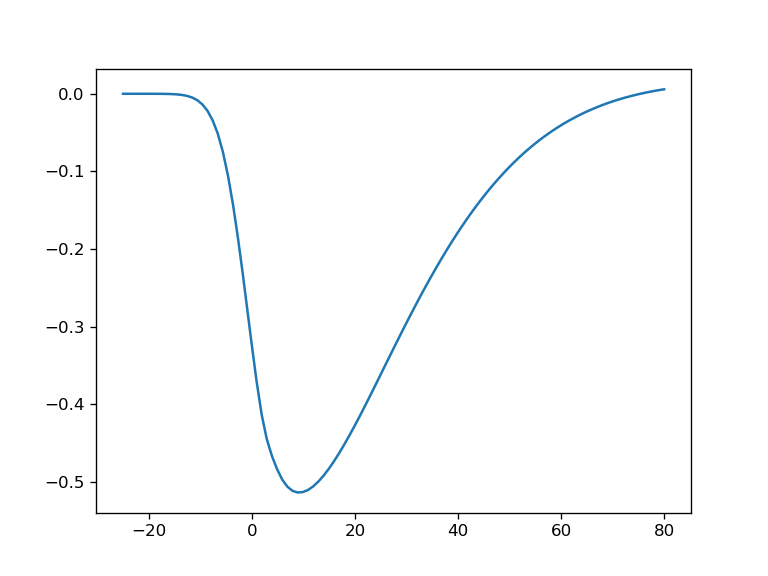

In [14]:
plt.figure()
plt.plot(sol.t, sol.E_free[0])

<IPython.core.display.Javascript object>


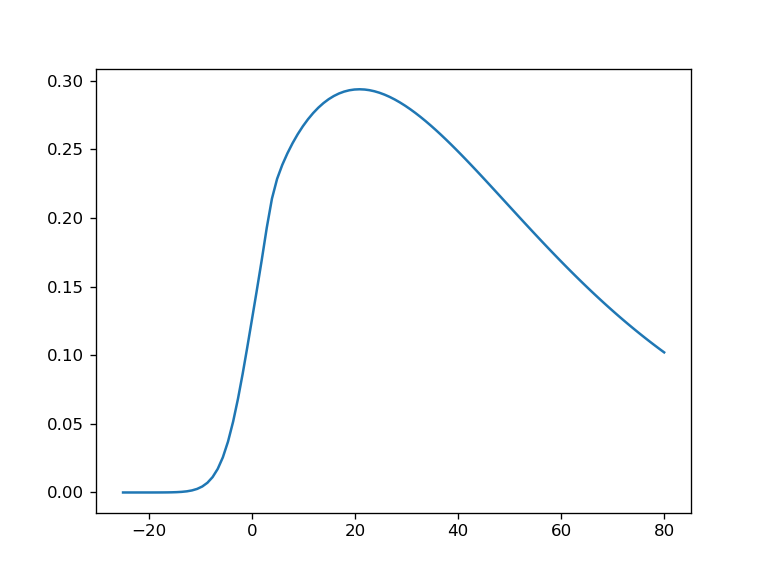

In [15]:
plt.figure()
plt.plot(sol.t, sol.R_free[0])

<IPython.core.display.Javascript object>


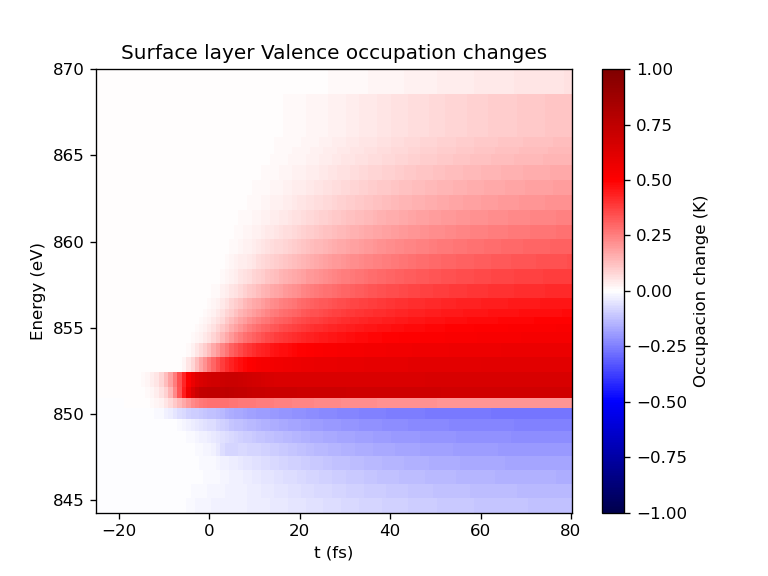

(844.2875, 870.0)

In [10]:
plt.figure()
plt.pcolormesh(sol.t, PAR.E_j +PAR.E_f,
               (sol.rho_j[0]-np.outer(PAR.rho_j_0,np.ones(sol.t.shape)))/np.outer(PAR.m_j,np.ones(sol.t.shape)),
               cmap = plt.cm.seismic, vmin = -1, vmax = 1, shading = 'nearest')#
plt.colorbar(label = 'Occupacion change (K)')
plt.xlabel('t (fs)')
plt.ylabel('Energy (eV)')
plt.title('Surface layer Valence occupation changes')
plt.ylim(None, 870)

<IPython.core.display.Javascript object>


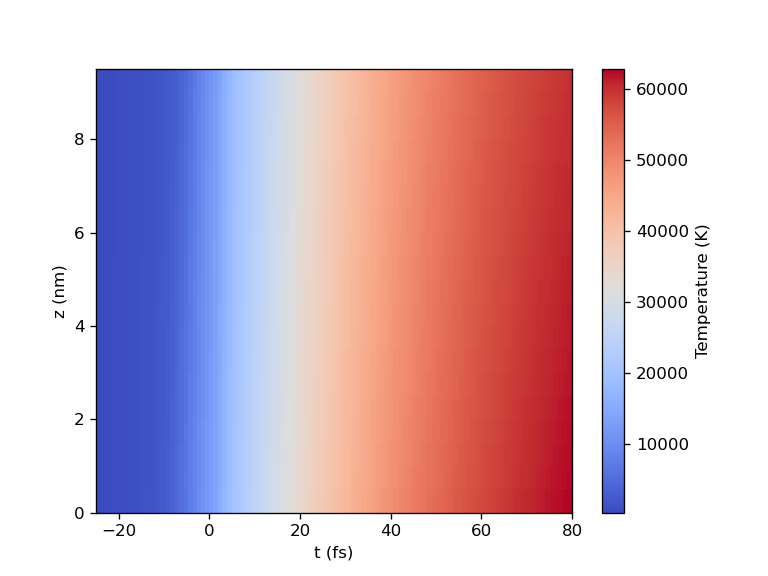

/tmp/ipykernel_200560/160184166.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)


Text(0, 0.5, 'z (nm)')

In [11]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)
plt.colorbar(label = 'Temperature (K)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


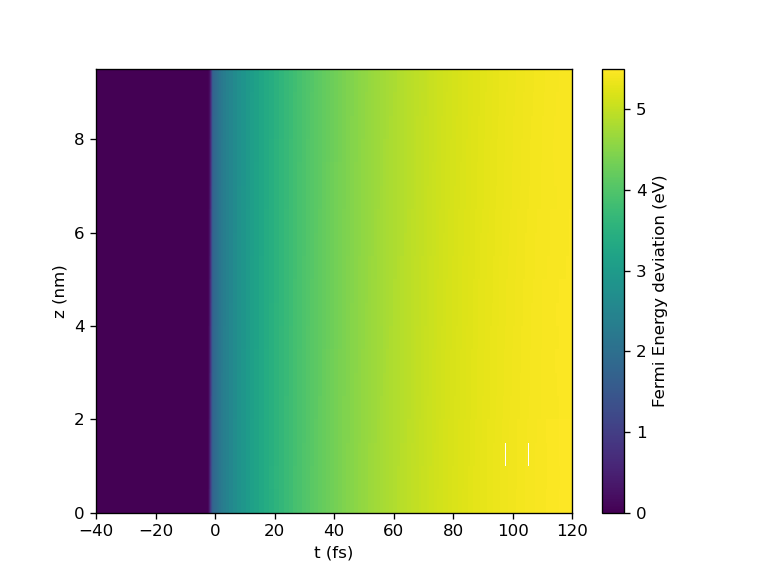

/tmp/ipykernel_186854/203480434.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)


Text(0, 0.5, 'z (nm)')

In [35]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)
plt.colorbar(label = 'Fermi Energy deviation (eV)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


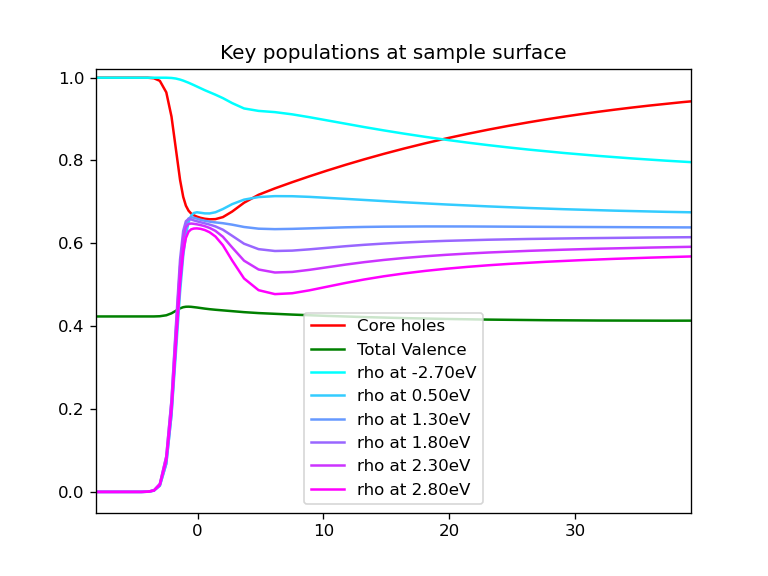

In [12]:
plt.figure()
plt.title('Key populations at sample surface')
plt.plot(sol.t,sol.core[0]/PAR.M_core, c='red', label = 'Core holes')
plt.plot(sol.t,(sol.R_VB[0])/PAR.M_VB, c='green',label = 'Total Valence')
cols = plt.cm.cool(np.linspace(0,1,PAR.N_photens))
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,sol.rho_j[0,PAR.resonant,:][iE].T/PAR.m_j[PAR.resonant][iE],c = cols[iE], label = f'rho at {E:.2f}eV')
plt.legend()


<IPython.core.display.Javascript object>


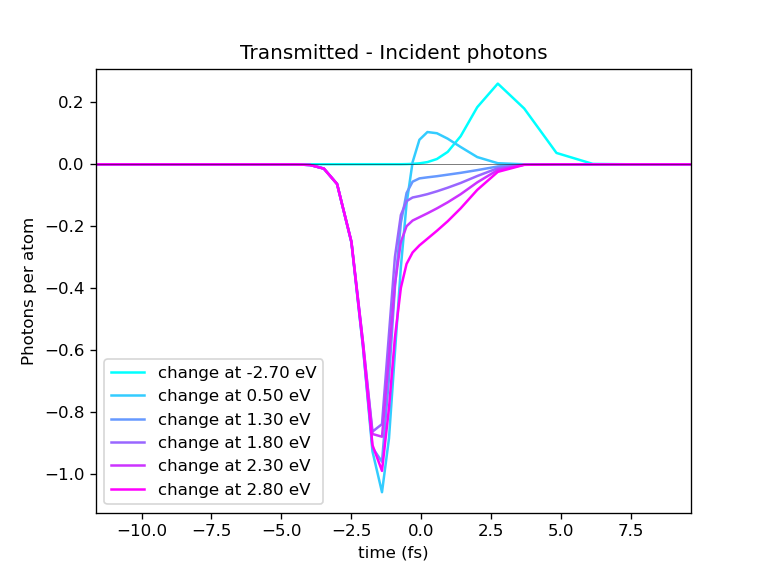

Text(0, 0.5, 'Photons per atom')

In [13]:
T = (sol.photon_densities[-1]-sol.photon_densities[0])#/np.max(sol.photon_densities[0],1)

plt.figure()
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,T[iE],c = cols[iE], label = f'change at {E:.2f} eV')
plt.axhline(c='k', lw = 0.3)
plt.legend()

plt.title('Transmitted - Incident photons')
plt.xlabel('time (fs)')
plt.ylabel('Photons per atom')

In [24]:
PAR.M_core

2

<IPython.core.display.Javascript object>


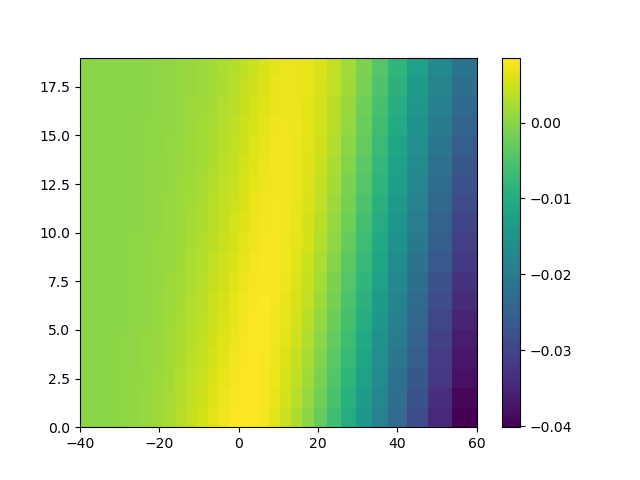

/tmp/ipykernel_121456/52012410.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)


In [34]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)
plt.colorbar()

In [21]:
sol.t.shape

(40,)

In [77]:
def make_valence_energy_axis(self, N_j: int, min=-6, finemax=10, max=50):
        """
        Creates an energy axis for the valence band, namely
            self.E_j
        and its edgepoints
            self.enax_j_edges
        Energies are relative to the fermi-level. 3/4 of all points fall into the range (min, finemax)
        Makes sure that the energies E_i correspond to a point in E_j and
        drops the closest points to keep the number N_j.
        :param N_j:
        :param min:
        :param finemax:
        :param max:
        :return:
        """
        N_j_fine = int(N_j * 3 / 4)
        N_j_coarse = int(N_j - N_j_fine)

        def fill_biggest_gap(pointlist):
            """
            This function takes a list of points and appends a point in the middle of the biggest gap
            """
            pointlist = np.array(np.sort(pointlist))
            gaps = pointlist[1:]-pointlist[:-1]
            biggest_gap_index = np.argsort(gaps)[-1]
            biggest_gap = gaps[biggest_gap_index]
            list_before = pointlist[:biggest_gap_index+1]
            new_value = pointlist[biggest_gap_index] + 0.5*biggest_gap
            list_after = pointlist[biggest_gap_index+1:]
            return np.concatenate((list_before, [new_value,], list_after))
        
        # The energies E_i and 0 must be in the axis
        enax_j_fine = [min, 0, finemax]+list(self.E_i[self.E_i<=finemax])
        # Fill up the gaps
        while len(enax_j_fine)<N_j_fine:
            enax_j_fine = fill_biggest_gap(enax_j_fine)
        
        dE = np.mean(enax_j_fine[1:]-enax_j_fine[:-1])
        #The same for the coarse part
        enax_j_coarse = [finemax+dE, max]+list(self.E_i[self.E_i>finemax])
        while len(enax_j_coarse)<N_j_coarse:
            enax_j_coarse = fill_biggest_gap(enax_j_coarse)
            
        enax_j = np.concatenate((enax_j_fine, enax_j_coarse))

        if not len(enax_j) == N_j:
            warnings.warn(
                'Energy Axis turned out longer or shorter than planned. What went wrong?')
            self.N_j = len(enax_j)
            
        def edgepoints(middles):
            """ Opposite of midpoints """
            edges = np.empty(middles.shape[0] + 1)
            edges[1:-1] = (middles[1:] + middles[:-1]) / 2
            edges[0] = middles[0] - (middles[1] - middles[0]) / 2
            edges[-1] = middles[-1] + (middles[-1] - middles[-2]) / 2
            return edges

        return enax_j, edgepoints(enax_j)

In [55]:
sim.plot_derivatives?

<IPython.core.display.Javascript object>


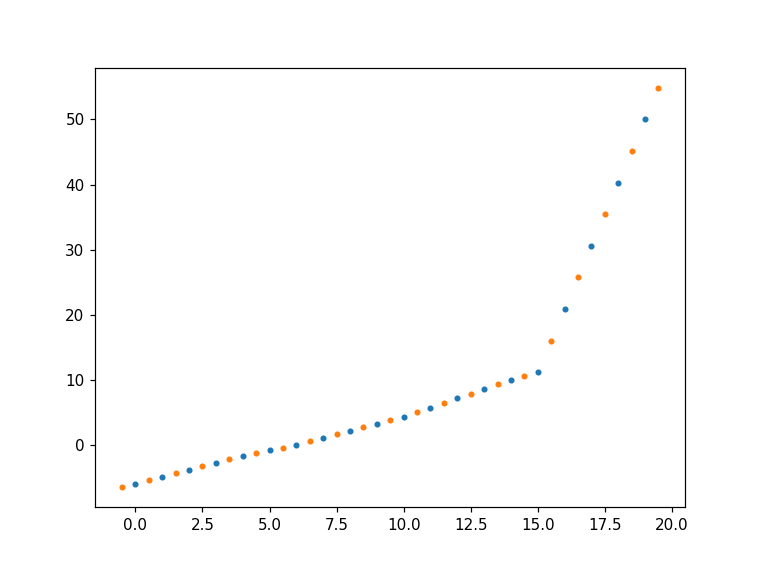

In [82]:
enax, enax_edges = make_valence_energy_axis(PAR, 20, min=-6, finemax=10, max=50)
plt.figure()
plt.plot(np.arange(len(enax)),enax,'.')
plt.plot(np.arange(len(enax_edges))-0.5,enax_edges,'.')